## TODO:
clean up notebook, figure out what else to do here

In [396]:
import psycopg
import pandas as pd
import seaborn as sns
import geopandas as gpd

from datetime import datetime

sns.set_theme(palette='Set2')

In [217]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT 
                provider, 
                bike_id,
                CAST(time_scraped AS timestamp) AS time_scraped,
                ST_AsText(geometry)
            FROM vehicles
            WHERE time_scraped > '2022-04-19 02:00:00-04' 
            AND time_scraped < '2022-04-19 03:00:00-04';
            """)
        
        test_data = cur.fetchall()

In [218]:
test_data

[('Helbiz',
  'BROKENIOT',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-77.23427 38.875402)'),
 ('Helbiz',
  'EFKMCK',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-77.027294 38.97852)'),
 ('Helbiz',
  'UFFZ2S',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-77.039088 38.923105)'),
 ('Helbiz',
  'UFFVZ1',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-77.041965 38.907282)'),
 ('Helbiz',
  'UFF41X',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-77.031789 38.903698)'),
 ('Helbiz',
  'EFKMHM',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-76.949964 38.893869)'),
 ('Helbiz',
  'BROKENIOT',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-77.234439 38.875546)'),
 ('Helbiz',
  'UFF4BH',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-76.952528 38.905888)'),
 ('Helbiz',
  'EFKMDP',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-77.051465 38.906159)'),
 ('Helbiz',
  'UFFVQS',
  datetime.datetime(2022, 4, 19, 2, 1),
  'POINT(-77.037449 38.93533)'),
 ('Bird',
  '7832

In [219]:
test_df = pd.DataFrame(test_data, columns=['provider', 'bike_id', 'time_scraped', 'geometry'])

In [220]:
test_df

,provider,bike_id,time_scraped,geometry
0,Helbiz,BROKENIOT,2022-04-19 02:01:00,POINT(-77.23427 38.875402)
1,Helbiz,EFKMCK,2022-04-19 02:01:00,POINT(-77.027294 38.97852)
2,Helbiz,UFFZ2S,2022-04-19 02:01:00,POINT(-77.039088 38.923105)
3,Helbiz,UFFVZ1,2022-04-19 02:01:00,POINT(-77.041965 38.907282)
4,Helbiz,UFF41X,2022-04-19 02:01:00,POINT(-77.031789 38.903698)
...,...,...,...,...
626096,Helbiz,UFFZX0,2022-04-19 02:01:00,POINT(-77.014432 38.826519)
626097,Helbiz,UFFZWY,2022-04-19 02:01:00,POINT(-77.037651 38.90674)
626098,Helbiz,UFF4B1,2022-04-19 02:01:00,POINT(-76.946665 38.898009)
626099,Helbiz,UFF40S,2022-04-19 02:01:00,POINT(-77.08639 38.936138)


In [224]:
geometry = gpd.GeoSeries.from_wkt(test_df['geometry'])

test_gdf = gpd.GeoDataFrame(test_df, geometry=geometry, crs='epsg:4326')

In [225]:
test_gdf

,provider,bike_id,time_scraped,geometry
0,Helbiz,BROKENIOT,2022-04-19 02:01:00,POINT (-77.23427 38.87540)
1,Helbiz,EFKMCK,2022-04-19 02:01:00,POINT (-77.02729 38.97852)
2,Helbiz,UFFZ2S,2022-04-19 02:01:00,POINT (-77.03909 38.92310)
3,Helbiz,UFFVZ1,2022-04-19 02:01:00,POINT (-77.04197 38.90728)
4,Helbiz,UFF41X,2022-04-19 02:01:00,POINT (-77.03179 38.90370)
...,...,...,...,...
626096,Helbiz,UFFZX0,2022-04-19 02:01:00,POINT (-77.01443 38.82652)
626097,Helbiz,UFFZWY,2022-04-19 02:01:00,POINT (-77.03765 38.90674)
626098,Helbiz,UFF4B1,2022-04-19 02:01:00,POINT (-76.94666 38.89801)
626099,Helbiz,UFF40S,2022-04-19 02:01:00,POINT (-77.08639 38.93614)


In [207]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT 
                provider, 
                bike_id,
                CAST(time_scraped AS timestamp) AS time_scraped,
                geometry
            FROM vehicles
            WHERE time_scraped > '2022-04-19 02:00:00-04' 
            AND time_scraped < '2022-04-19 03:00:00-04';
            """)
        
        test_data = cur.fetchall()

In [208]:
test_df = pd.DataFrame(test_data, columns=['provider', 'bike_id', 'time_scraped', 'geometry_wkb'])

In [209]:
test_df

,provider,bike_id,time_scraped,geometry_wkb
0,Helbiz,UFF4B1,2022-04-19 02:01:00,0101000020E610000024D1CB28963C53C0C0417BF5F172...
1,Bird,bb776b06-7e82-43dd-a356-bcbb3eaed2d7,2022-04-19 02:14:00,0101000020E61000004CD7FABF364053C05885F67F4874...
2,Bird,d21c0a1a-ab18-4a7a-858d-3d85e5dda3c8,2022-04-19 02:14:00,0101000020E6100000462575029A4253C0EF4AFD827E73...
3,Bird,9009c83f-5d7c-47df-b7ba-7a88f93bf04d,2022-04-19 02:14:00,0101000020E6100000C1FB91BFC74053C08B1A4CC3F075...
4,Bird,d99dc6c3-511f-43a5-aeb9-e44d682a7e85,2022-04-19 02:14:00,0101000020E6100000772D211FF44253C0A17454FB1575...
...,...,...,...,...
626096,Spin,bb38868f-7507-4f28-bb5b-b660b7973518,2022-04-19 02:01:00,0101000020E61000006DE4BA29E54453C09373620FED7B...
626097,Spin,c67c82f8-bef9-4069-b74b-b2117502706b,2022-04-19 02:01:00,0101000020E6100000D2C3D0EAE44253C0E12879758E73...
626098,Spin,0edc5ca8-22f1-42c3-832e-9605640c7bfd,2022-04-19 02:01:00,0101000020E6100000280CCA349A4153C0D74D29AF9578...
626099,Spin,03c85233-04ef-4857-9f4a-c59e2a1da951,2022-04-19 02:01:00,0101000020E61000001A868F88294153C00873BB97FB72...


In [127]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT
                provider, 
                bike_id, 
                CAST(MIN(time_scraped) AS timestamp) AS min_time, 
                CAST(MAX(time_scraped) AS timestamp) AS max_time,
                MAX(time_scraped) - MIN(time_scraped) AS duration
            FROM vehicles
            WHERE time_scraped >= '2022-04-19 00:00:00-04' 
            AND time_scraped <= '2022-04-20 00:00:00-04'
            GROUP BY provider, bike_id;
            """)
        
        data = cur.fetchall()

In [128]:
df = pd.DataFrame(data, columns=['provider', 'bike_id', 'min_time', 'max_time', 'duration'])

In [129]:
df

,provider,bike_id,min_time,max_time,duration
0,Bird,0000013d-6b30-4ac7-b2e0-bec35806ec2f,2022-04-19 09:28:00,2022-04-19 09:28:00,0 days
1,Bird,00000917-a423-4c12-908e-fa4f21c8a6e7,2022-04-19 02:00:00,2022-04-19 02:00:00,0 days
2,Bird,00000964-ef30-4fdc-aeb0-9efca6d2bac4,2022-04-19 13:49:00,2022-04-19 13:49:00,0 days
3,Bird,0000136b-e9d5-4472-80a2-7c8f3330a116,2022-04-19 22:04:00,2022-04-19 22:04:00,0 days
4,Bird,00001b2d-bffa-4363-8757-3066428a8531,2022-04-19 05:12:00,2022-04-19 05:12:00,0 days
...,...,...,...,...,...
2705732,Spin,feff1834-7dcb-4ce4-823d-b53dbf53f195,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days
2705733,Spin,ff61b472-caa0-4aae-97e5-c46331f0ea6c,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days
2705734,Spin,ffaab673-02a6-47eb-b4da-2e02c1987ab8,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days
2705735,Spin,ffcacd54-74e0-4423-9163-88c3c2bd21a0,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days


In [21]:
data

[('Bird',
  '00000315-1c97-48a5-a046-d51a4b54df89',
  datetime.datetime(2022, 4, 18, 17, 22, tzinfo=backports.zoneinfo.ZoneInfo(key='America/New_York')),
  datetime.datetime(2022, 4, 18, 17, 22, tzinfo=backports.zoneinfo.ZoneInfo(key='America/New_York')),
  datetime.timedelta(0)),
 ('Bird',
  '000006cc-3b21-4147-975c-befb34d50dc9',
  datetime.datetime(2022, 4, 19, 2, 49, tzinfo=backports.zoneinfo.ZoneInfo(key='America/New_York')),
  datetime.datetime(2022, 4, 19, 2, 49, tzinfo=backports.zoneinfo.ZoneInfo(key='America/New_York')),
  datetime.timedelta(0)),
 ('Bird',
  '000026ad-b420-4034-9b38-e25282a46f57',
  datetime.datetime(2022, 4, 18, 16, 46, tzinfo=backports.zoneinfo.ZoneInfo(key='America/New_York')),
  datetime.datetime(2022, 4, 18, 16, 47, tzinfo=backports.zoneinfo.ZoneInfo(key='America/New_York')),
  datetime.timedelta(seconds=60)),
 ('Bird',
  '000028ca-f164-4fc7-bc0a-de4baf8c76ba',
  datetime.datetime(2022, 4, 18, 4, 49, tzinfo=backports.zoneinfo.ZoneInfo(key='America/New_Yor

In [17]:
len(data)

2338137

In [18]:
len(df)

2338137

### get duration by vehicle id

In [131]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT 
                provider, 
                bike_id, 
                CAST(MIN(time_scraped) AS timestamp) AS min_time, 
                CAST(MAX(time_scraped) AS timestamp) AS max_time,
                MAX(time_scraped) - MIN(time_scraped) AS duration
            FROM vehicles
            WHERE time_scraped >= '2022-04-19 00:00:00-04' 
            AND time_scraped <= '2022-04-20 00:00:00-04'
            GROUP BY provider, bike_id
            ORDER BY duration DESC
            """)
        
        max_duration_by_id = cur.fetchall()

In [132]:
max_duration_by_id_df = pd.DataFrame(max_duration_by_id, 
                                     columns=['provider', 'bike_id', 'min_time', 'max_time', 'duration'])

In [133]:
max_duration_by_id_df['duration_minutes'] = (
    (max_duration_by_id_df['duration'] / pd.Timedelta('60s')).astype('int'))

In [92]:
max_duration_by_id_df_no_times = max_duration_by_id_df.drop(columns=['min_time', 'max_time'])

In [93]:
max_duration_by_id_df_no_times

,provider,bike_id,duration,duration_minutes
0,Helbiz,AFKEAU,1 days,1440
1,Helbiz,AFKG77,1 days,1440
2,Helbiz,AFKERG,1 days,1440
3,Helbiz,AFKE3D,1 days,1440
4,Helbiz,AFKEY6,1 days,1440
...,...,...,...,...
2705732,Bird,84f60dcc-a6ec-451b-9594-23524b32ffb3,0 days,0
2705733,Bird,84f61e80-eff5-468f-b31f-fa287d5164a4,0 days,0
2705734,Bird,84f62320-f789-4b96-9f57-b63b36b8d68f,0 days,0
2705735,Bird,84f6321b-4e21-4d00-a2e8-c51e1a4260c4,0 days,0


In [134]:
max_duration_by_id_df

,provider,bike_id,min_time,max_time,duration,duration_minutes
0,Helbiz,AFKEAU,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days,1440
1,Helbiz,AFKG77,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days,1440
2,Helbiz,AFKERG,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days,1440
3,Helbiz,AFKE3D,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days,1440
4,Helbiz,AFKEY6,2022-04-19 00:00:00,2022-04-20 00:00:00,1 days,1440
...,...,...,...,...,...,...
2705732,Bird,84f60dcc-a6ec-451b-9594-23524b32ffb3,2022-04-19 09:04:00,2022-04-19 09:04:00,0 days,0
2705733,Bird,84f61e80-eff5-468f-b31f-fa287d5164a4,2022-04-19 03:53:00,2022-04-19 03:53:00,0 days,0
2705734,Bird,84f62320-f789-4b96-9f57-b63b36b8d68f,2022-04-19 05:24:00,2022-04-19 05:24:00,0 days,0
2705735,Bird,84f6321b-4e21-4d00-a2e8-c51e1a4260c4,2022-04-19 19:09:00,2022-04-19 19:09:00,0 days,0


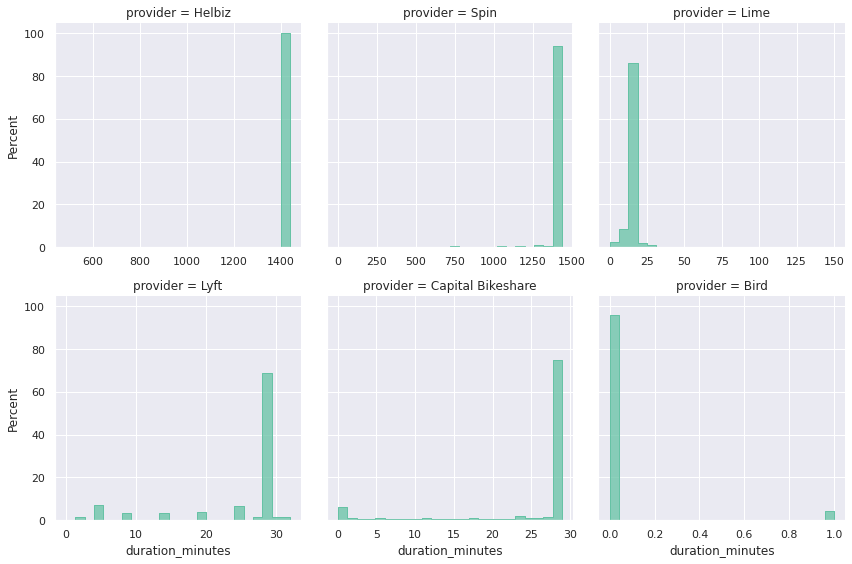

In [416]:
g = sns.FacetGrid(data=max_duration_by_id_df, col='provider', sharex=False, col_wrap=3, height=4, aspect=1)

g.map(sns.histplot, 'duration_minutes', stat='percent', bins=24, element='step')

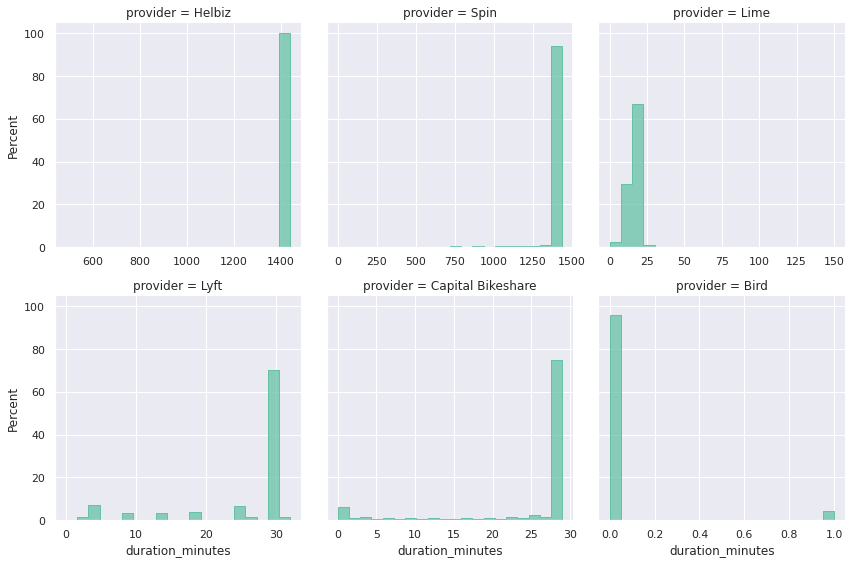

In [410]:
g = sns.FacetGrid(data=max_duration_by_id_df, col='provider', sharex=False, col_wrap=3, height=4, aspect=1)

g.map(sns.histplot, 'duration_minutes', stat='percent', bins=20, element='step')

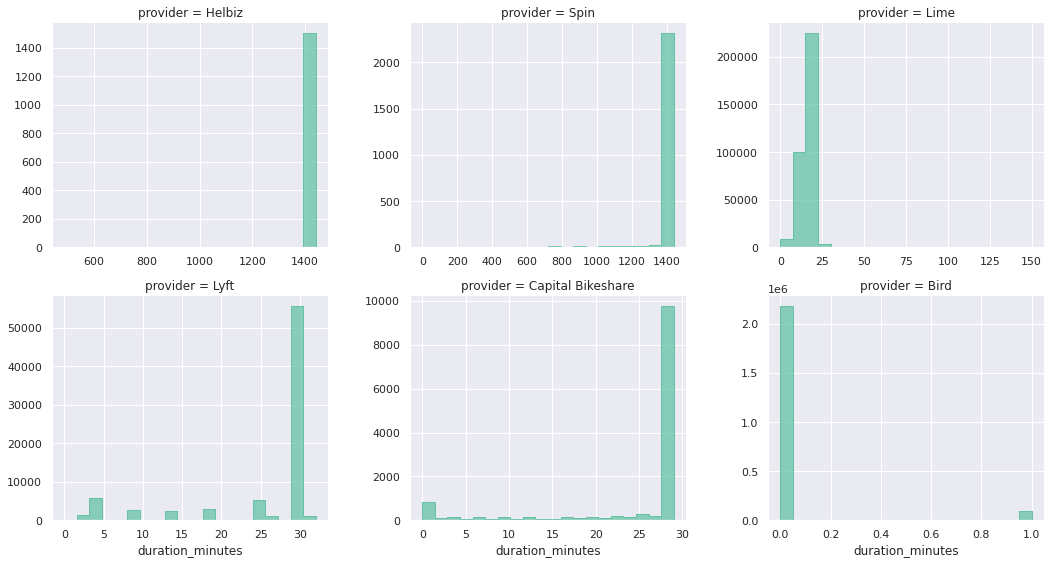

In [414]:
g = sns.FacetGrid(max_duration_by_id_df, col='provider', sharex=False, sharey=False, col_wrap=3, 
                  height=4, aspect=1.25)

g.map(sns.histplot, 'duration_minutes', bins=20, element='step')
g.set(ylabel='')

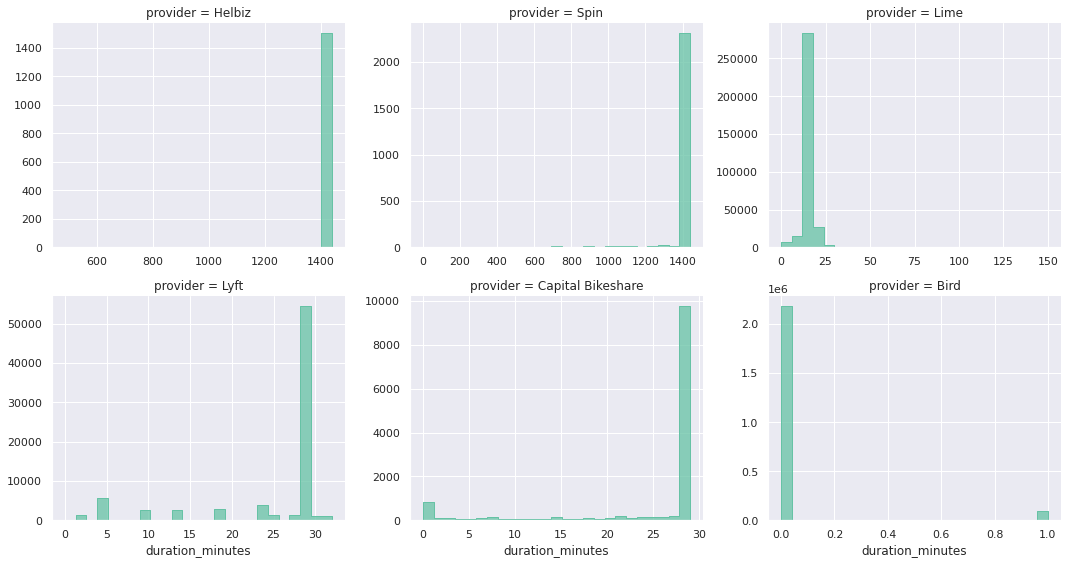

In [422]:
g = sns.FacetGrid(max_duration_by_id_df, col='provider', sharex=False, sharey=False, col_wrap=3, 
                  height=4, aspect=1.25)

g.map(sns.histplot, 'duration_minutes', bins=25, element='step')
g.set(ylabel='')
g.tight_layout()

In [111]:
def get_durations_by_provider(provider):  
    df = max_duration_by_id_df_no_times.query("provider == @provider")
    return df

In [112]:
lime_id_durations = get_durations_by_provider('Lime')

In [144]:
lime_id_durations

,provider,bike_id,duration,duration_minutes
3946,Lime,ebf66bc2-93e6-4cd2-9422-3c4b3c4b962a,0 days 02:30:00,150
3947,Lime,d6679783-d9ee-4c71-9f69-dd6b5c60fc5c,0 days 02:16:00,136
3952,Lime,43c564fd-fad3-4a6d-b1bc-e41103a0636b,0 days 01:31:00,91
3953,Lime,89c256b2-cadf-4c3f-97d0-bf34ee87f86b,0 days 01:30:00,90
11425,Lime,7f762051-4b82-4cda-a0ee-bf6a013dd24f,0 days 00:29:00,29
...,...,...,...,...
2383703,Lime,8e0b91c1-ee03-4ca0-8c80-829ce0a25623,0 days 00:00:00,0
2383704,Lime,8a056519-44e5-4450-b86f-030c0cc2003b,0 days 00:00:00,0
2383705,Lime,81798591-2db1-433d-b636-cf2cb0d86c7a,0 days 00:00:00,0
2383706,Lime,911b9c7d-b5c3-435d-b784-9ca5b5f5f561,0 days 00:00:00,0


In [149]:
lime_id_durations['duration_minutes'].value_counts()

16     91221
15     75843
14     48040
17     30291
13     23960
18     20469
12     13796
11      7762
19      6789
4       4501
9       4442
29      3187
10       987
3        827
5        822
7        798
6        761
0        702
8        582
2        379
1        268
25        27
28        21
20        16
26        16
23         4
27         4
24         3
136        1
22         1
90         1
91         1
150        1
Name: duration_minutes, dtype: int64

In [147]:
bird_id_durations = get_durations_by_provider('Bird')

In [148]:
bird_id_durations['duration_minutes'].value_counts()

0    2176127
1      97106
Name: duration_minutes, dtype: int64

In [150]:
helbiz_id_durations = get_durations_by_provider('Helbiz')

In [151]:
helbiz_id_durations['duration_minutes'].value_counts()

1440    1500
487        1
Name: duration_minutes, dtype: int64

In [152]:
spin_id_durations = get_durations_by_provider('Spin')

In [153]:
spin_id_durations['duration_minutes'].value_counts()

1440    2263
1439      23
1387       3
1397       2
1262       2
        ... 
1246       1
1264       1
1271       1
1272       1
0          1
Name: duration_minutes, Length: 154, dtype: int64

### get max duration by vehicle id by provider
to determine which providers reset their IDs and how often

In [62]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT provider, MAX(duration) AS max_duration
            FROM (
                SELECT 
                    provider, 
                    bike_id, 
                    MIN(time_scraped) AS min_time, 
                    MAX(time_scraped) AS max_time,
                    MAX(time_scraped) - MIN(time_scraped) AS duration
                FROM vehicles
                WHERE time_scraped >= '2022-04-20 00:00:00-04' 
                AND time_scraped <= '2022-04-21 00:00:00-04'
                GROUP BY provider, bike_id
                ORDER BY duration DESC
                ) AS temp
            GROUP BY provider
            ORDER BY max_duration;
            """)
        
        max_duration_by_provider = cur.fetchall()

In [63]:
max_duration_by_provider_df = pd.DataFrame(max_duration_by_provider, columns=['provider', 'max_duration'])

In [32]:
max_duration_by_provider_df = pd.DataFrame(max_duration_by_provider, columns=['provider', 'max_duration'])

In [56]:
max_duration_by_provider_df['max_duration_minutes'] = (
    (max_duration_by_provider_df['max_duration'] / pd.Timedelta('60s')).astype('int'))

In [57]:
max_duration_by_provider_df

,provider,max_duration,max_duration_minutes
0,Bird,0 days 00:01:00,1
1,Lyft,0 days 00:29:00,29
2,Capital Bikeshare,0 days 00:30:00,30
3,Lime,0 days 07:15:00,435
4,Spin,1 days 00:00:00,1440
5,Helbiz,1 days 00:00:00,1440


In [65]:
max_duration_by_provider_df['max_duration_minutes'] = (
    (max_duration_by_provider_df['max_duration'] / pd.Timedelta('60s')).astype('int'))

In [66]:
max_duration_by_provider_df

,provider,max_duration,max_duration_minutes
0,Bird,0 days 00:01:00,1
1,Capital Bikeshare,0 days 00:29:00,29
2,Lyft,0 days 00:30:00,30
3,Lime,0 days 21:16:00,1276
4,Helbiz,0 days 23:59:00,1439
5,Spin,0 days 23:59:00,1439


In [37]:
type(max_duration_by_provider_df['max_duration'][0])

pandas._libs.tslibs.timedeltas.Timedelta

<AxesSubplot:xlabel='max_duration_minutes', ylabel='provider'>

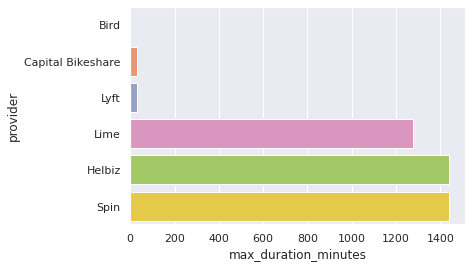

In [428]:
sns.barplot(data=max_duration_by_provider_df, y='provider', x='max_duration_minutes', orient='h')

### get bounding boxes by ID

In [176]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT 
                provider, 
                bike_id, 
                ST_Extent(geometry) AS extent
            FROM vehicles
            WHERE provider = 'Lime'
            GROUP BY provider, bike_id;
            """)
        
        extent_by_id_lime = cur.fetchall()

In [177]:
extent_by_id_lime

[('Lime',
  '00000250-3805-4017-af86-839eda5318b9',
  'BOX(-76.9915 38.8858,-76.9915 38.8858)'),
 ('Lime',
  '000014db-5e80-415e-93b8-44a4e01c42b0',
  'BOX(-77.0414 38.9296,-77.0414 38.9296)'),
 ('Lime',
  '00001d3d-42c7-4300-a23a-ebb95a43096e',
  'BOX(-77.0327 38.9283,-77.0327 38.9283)'),
 ('Lime',
  '00002406-fc81-4d62-88a4-baaac0b34a17',
  'BOX(-77.0366 38.9393,-77.0366 38.9393)'),
 ('Lime',
  '00008dfe-fd2c-455a-a34b-11c20686594d',
  'BOX(-77.0199 38.9009,-77.0199 38.9009)'),
 ('Lime',
  '0000908f-38ca-4662-b305-e86131a1137b',
  'BOX(-77.0165 38.9105,-77.0165 38.9106)'),
 ('Lime',
  '0000cf30-d08e-46f1-9f76-eb3b0ebfbc93',
  'BOX(-77.0321 38.8933,-77.0321 38.8933)'),
 ('Lime',
  '0000d741-2323-4ff1-bfc0-66f672843ad5',
  'BOX(-77.0046 38.9127,-77.0046 38.9127)'),
 ('Lime',
  '00010199-5906-4184-9cce-d9e20a09d8e5',
  'BOX(-77.035 38.9234,-77.035 38.9234)'),
 ('Lime',
  '000102af-e53a-4744-9520-9317467d02a8',
  'BOX(-77.0332 38.889,-77.0332 38.889)'),
 ('Lime',
  '00014f6e-e8e6-49cc-ac

In [236]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT 
                provider, 
                bike_id, 
                CAST(MIN(time_scraped) AS timestamp) AS min_time, 
                CAST(MAX(time_scraped) AS timestamp) AS max_time,
                MAX(time_scraped) - MIN(time_scraped) AS duration,
                ST_AsText(ST_SetSRID(ST_Extent(geometry), 4326)) AS extent
            FROM vehicles
            WHERE provider = 'Lime'
            GROUP BY provider, bike_id
            ORDER BY duration DESC;
            """)
        
        extent_by_id_lime = cur.fetchall()

In [238]:
extent_by_id_lime_df = pd.DataFrame(extent_by_id_lime, columns=['provider', 
                                                                'bike_id',
                                                                'min_time',
                                                                'max_time',
                                                                'duration',
                                                                'geometry'])

In [239]:
extent_by_id_lime

[('Lime',
  '0d09a371-e42c-4f9f-8846-da847a0a7bce',
  datetime.datetime(2022, 4, 20, 0, 17),
  datetime.datetime(2022, 4, 20, 21, 33),
  datetime.timedelta(seconds=76560),
  'POINT(-76.9904 38.9561)'),
 ('Lime',
  'd046cfdf-1181-4509-8f28-5ec277137a21',
  datetime.datetime(2022, 4, 19, 20, 32),
  datetime.datetime(2022, 4, 20, 7, 50),
  datetime.timedelta(seconds=40680),
  'POINT(-77.0013 38.9647)'),
 ('Lime',
  '4ddb0dc3-9ccf-4847-929f-198b378d05cf',
  datetime.datetime(2022, 4, 20, 1, 18),
  datetime.datetime(2022, 4, 20, 7, 4),
  datetime.timedelta(seconds=20760),
  'LINESTRING(-76.9971 38.9613,-76.9971 38.9614)'),
 ('Lime',
  '196a84bd-ffe3-4fb3-8336-db10555dc9fe',
  datetime.datetime(2022, 4, 18, 7, 46),
  datetime.datetime(2022, 4, 18, 13, 30),
  datetime.timedelta(seconds=20640),
  'POINT(-77.0013 38.9647)'),
 ('Lime',
  'b358d3aa-43ad-49fe-a54a-32afe01322e3',
  datetime.datetime(2022, 4, 18, 14, 33),
  datetime.datetime(2022, 4, 18, 19, 32),
  datetime.timedelta(seconds=17940),

In [240]:
extent_by_id_lime_df

,provider,bike_id,min_time,max_time,duration,geometry
0,Lime,0d09a371-e42c-4f9f-8846-da847a0a7bce,2022-04-20 00:17:00,2022-04-20 21:33:00,0 days 21:16:00,POINT(-76.9904 38.9561)
1,Lime,d046cfdf-1181-4509-8f28-5ec277137a21,2022-04-19 20:32:00,2022-04-20 07:50:00,0 days 11:18:00,POINT(-77.0013 38.9647)
2,Lime,4ddb0dc3-9ccf-4847-929f-198b378d05cf,2022-04-20 01:18:00,2022-04-20 07:04:00,0 days 05:46:00,"LINESTRING(-76.9971 38.9613,-76.9971 38.9614)"
3,Lime,196a84bd-ffe3-4fb3-8336-db10555dc9fe,2022-04-18 07:46:00,2022-04-18 13:30:00,0 days 05:44:00,POINT(-77.0013 38.9647)
4,Lime,b358d3aa-43ad-49fe-a54a-32afe01322e3,2022-04-18 14:33:00,2022-04-18 19:32:00,0 days 04:59:00,"LINESTRING(-77.0014 38.9647,-77.0013 38.9647)"
...,...,...,...,...,...,...
951833,Lime,ad594da6-5e86-45cf-a131-3ef7bfa41663,2022-04-19 20:18:00,2022-04-19 20:18:00,0 days 00:00:00,POINT(-76.9919 38.8827)
951834,Lime,af0dc81a-9e77-4e1d-b964-961acca9b8b2,2022-04-19 18:35:00,2022-04-19 18:35:00,0 days 00:00:00,POINT(-77.0318 38.8938)
951835,Lime,aeb48957-061a-482d-830e-832aef18f354,2022-04-19 23:51:00,2022-04-19 23:51:00,0 days 00:00:00,POINT(-77.0214 38.9025)
951836,Lime,aec8b5ca-8cec-4e62-95fd-47c5aaf06314,2022-04-20 16:32:00,2022-04-20 16:32:00,0 days 00:00:00,POINT(-76.9977 38.9072)


In [243]:
geometry = gpd.GeoSeries.from_wkt(extent_by_id_lime_df['geometry'])

extent_by_id_lime_gdf = gpd.GeoDataFrame(extent_by_id_lime_df, geometry=geometry, crs='epsg:4326')

In [244]:
extent_by_id_lime_gdf

,provider,bike_id,min_time,max_time,duration,geometry
0,Lime,0d09a371-e42c-4f9f-8846-da847a0a7bce,2022-04-20 00:17:00,2022-04-20 21:33:00,0 days 21:16:00,POINT (-76.99040 38.95610)
1,Lime,d046cfdf-1181-4509-8f28-5ec277137a21,2022-04-19 20:32:00,2022-04-20 07:50:00,0 days 11:18:00,POINT (-77.00130 38.96470)
2,Lime,4ddb0dc3-9ccf-4847-929f-198b378d05cf,2022-04-20 01:18:00,2022-04-20 07:04:00,0 days 05:46:00,"LINESTRING (-76.99710 38.96130, -76.99710 38.9..."
3,Lime,196a84bd-ffe3-4fb3-8336-db10555dc9fe,2022-04-18 07:46:00,2022-04-18 13:30:00,0 days 05:44:00,POINT (-77.00130 38.96470)
4,Lime,b358d3aa-43ad-49fe-a54a-32afe01322e3,2022-04-18 14:33:00,2022-04-18 19:32:00,0 days 04:59:00,"LINESTRING (-77.00140 38.96470, -77.00130 38.9..."
...,...,...,...,...,...,...
951833,Lime,ad594da6-5e86-45cf-a131-3ef7bfa41663,2022-04-19 20:18:00,2022-04-19 20:18:00,0 days 00:00:00,POINT (-76.99190 38.88270)
951834,Lime,af0dc81a-9e77-4e1d-b964-961acca9b8b2,2022-04-19 18:35:00,2022-04-19 18:35:00,0 days 00:00:00,POINT (-77.03180 38.89380)
951835,Lime,aeb48957-061a-482d-830e-832aef18f354,2022-04-19 23:51:00,2022-04-19 23:51:00,0 days 00:00:00,POINT (-77.02140 38.90250)
951836,Lime,aec8b5ca-8cec-4e62-95fd-47c5aaf06314,2022-04-20 16:32:00,2022-04-20 16:32:00,0 days 00:00:00,POINT (-76.99770 38.90720)


<AxesSubplot:>

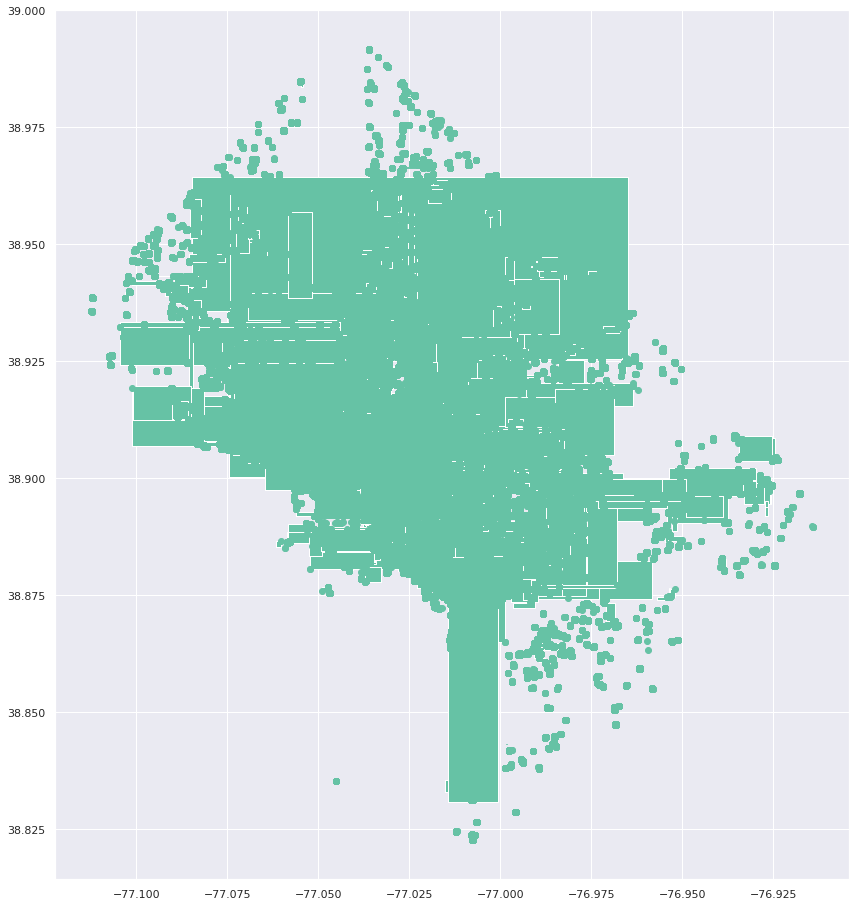

In [433]:
extent_by_id_lime_gdf.plot(figsize=(16, 16))

In [242]:
extent_by_id_lime_gdf[:100]

,provider,bike_id,geometry
0,Lime,00000250-3805-4017-af86-839eda5318b9,POINT (-76.99150 38.88580)
1,Lime,000014db-5e80-415e-93b8-44a4e01c42b0,POINT (-77.04140 38.92960)
2,Lime,00001d3d-42c7-4300-a23a-ebb95a43096e,POINT (-77.03270 38.92830)
3,Lime,00002406-fc81-4d62-88a4-baaac0b34a17,POINT (-77.03660 38.93930)
4,Lime,00008dfe-fd2c-455a-a34b-11c20686594d,POINT (-77.01990 38.90090)
...,...,...,...
95,Lime,00073a5c-4298-4ae9-82c6-d2fce6abcc30,POINT (-77.00140 38.88530)
96,Lime,00075d2c-c391-4336-a36e-99d57c118018,POINT (-76.98460 38.89360)
97,Lime,00076d49-fe3a-4fd0-9b20-28b608ff197d,POINT (-76.98320 38.86420)
98,Lime,0007742f-4861-4e0c-abcd-78e3991ff3fa,POINT (-77.01970 38.87820)


In [247]:
extent_by_id_lime_gdf[:50]

,provider,bike_id,min_time,max_time,duration,geometry
0,Lime,0d09a371-e42c-4f9f-8846-da847a0a7bce,2022-04-20 00:17:00,2022-04-20 21:33:00,0 days 21:16:00,POINT (-76.99040 38.95610)
1,Lime,d046cfdf-1181-4509-8f28-5ec277137a21,2022-04-19 20:32:00,2022-04-20 07:50:00,0 days 11:18:00,POINT (-77.00130 38.96470)
2,Lime,4ddb0dc3-9ccf-4847-929f-198b378d05cf,2022-04-20 01:18:00,2022-04-20 07:04:00,0 days 05:46:00,"LINESTRING (-76.99710 38.96130, -76.99710 38.9..."
3,Lime,196a84bd-ffe3-4fb3-8336-db10555dc9fe,2022-04-18 07:46:00,2022-04-18 13:30:00,0 days 05:44:00,POINT (-77.00130 38.96470)
4,Lime,b358d3aa-43ad-49fe-a54a-32afe01322e3,2022-04-18 14:33:00,2022-04-18 19:32:00,0 days 04:59:00,"LINESTRING (-77.00140 38.96470, -77.00130 38.9..."
5,Lime,a63c587a-545c-48dc-92fa-aec9dfb22f90,2022-04-18 07:33:00,2022-04-18 12:16:00,0 days 04:43:00,"LINESTRING (-77.00140 38.96470, -77.00130 38.9..."
6,Lime,f70786a3-1955-44d1-a369-1e933fe63e95,2022-04-20 14:04:00,2022-04-20 18:34:00,0 days 04:30:00,POINT (-76.99710 38.96140)
7,Lime,5799ff12-5afe-4e6a-8576-6c9772edeb43,2022-04-20 09:34:00,2022-04-20 14:03:00,0 days 04:29:00,POINT (-77.00130 38.96470)
8,Lime,a7c8c335-c060-410f-a7bf-261511fc7fc0,2022-04-18 23:50:00,2022-04-19 03:05:00,0 days 03:15:00,POINT (-77.01290 38.97380)
9,Lime,ebf66bc2-93e6-4cd2-9422-3c4b3c4b962a,2022-04-19 08:47:00,2022-04-19 11:17:00,0 days 02:30:00,POINT (-76.99710 38.96140)


In [250]:
url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/10/query?outFields=*&where=1%3D1&f=geojson'

dc = gpd.read_file(url)

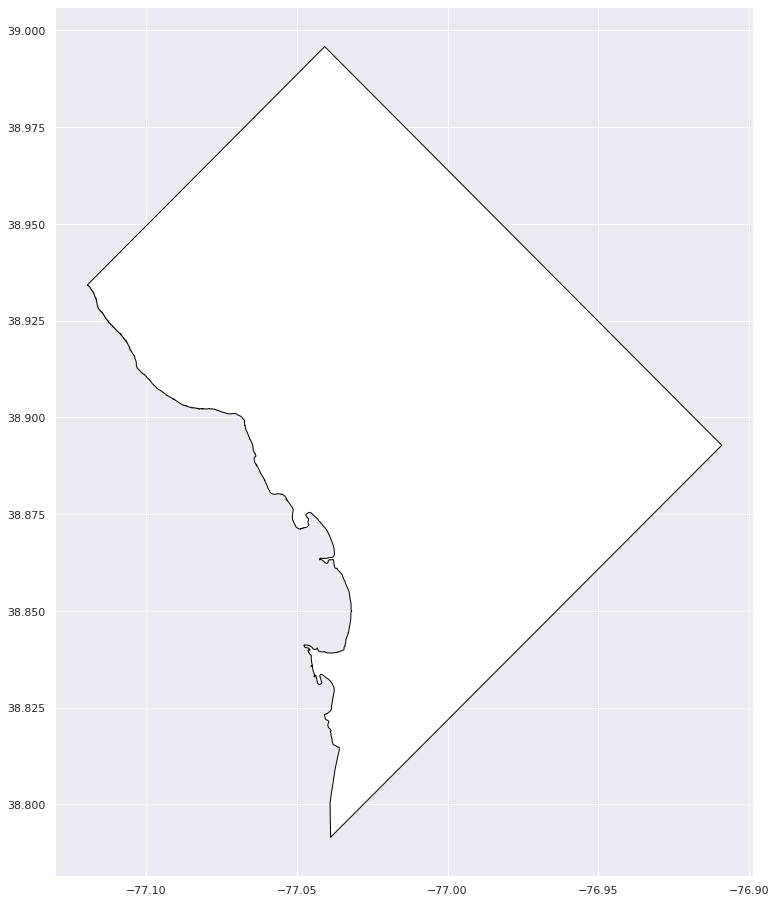

<AxesSubplot:>

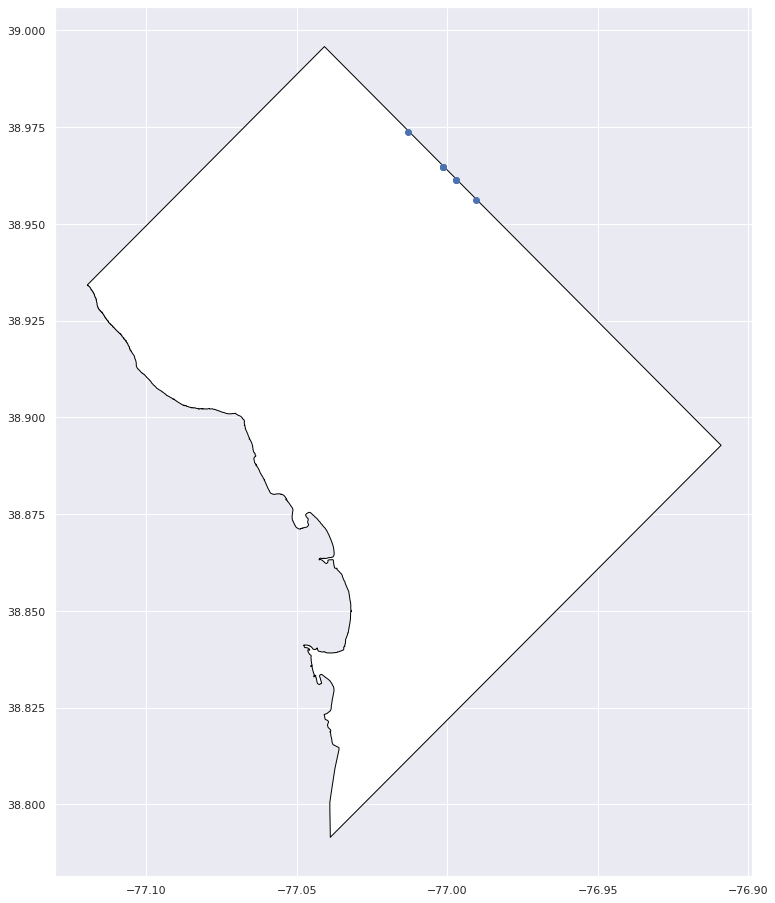

In [266]:
base = dc.plot(color='white', edgecolor='black', figsize=(16, 16))

extent_by_id_lime_gdf[:10].plot(ax=base, figsize=(16, 16))

<AxesSubplot:>

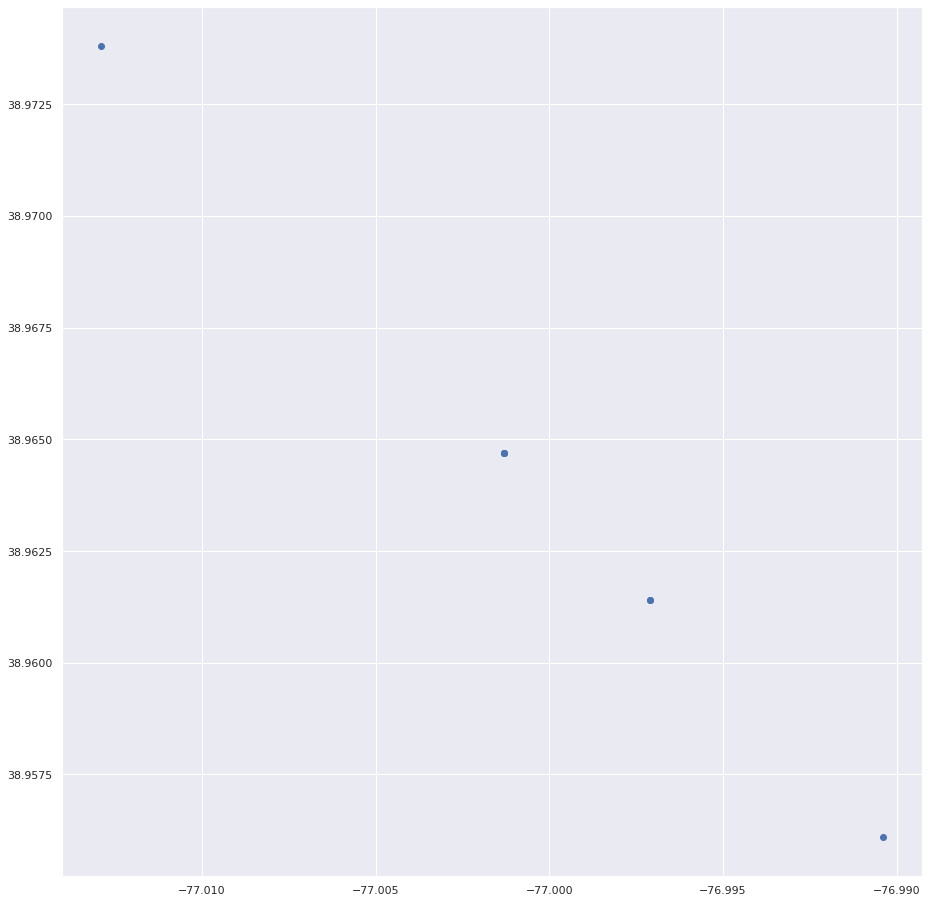

In [268]:
extent_by_id_lime_gdf[:10].plot(figsize=(16, 16))

In [267]:
extent_by_id_lime_gdf[:10]

,provider,bike_id,min_time,max_time,duration,geometry
0,Lime,0d09a371-e42c-4f9f-8846-da847a0a7bce,2022-04-20 00:17:00,2022-04-20 21:33:00,0 days 21:16:00,POINT (-76.99040 38.95610)
1,Lime,d046cfdf-1181-4509-8f28-5ec277137a21,2022-04-19 20:32:00,2022-04-20 07:50:00,0 days 11:18:00,POINT (-77.00130 38.96470)
2,Lime,4ddb0dc3-9ccf-4847-929f-198b378d05cf,2022-04-20 01:18:00,2022-04-20 07:04:00,0 days 05:46:00,"LINESTRING (-76.99710 38.96130, -76.99710 38.9..."
3,Lime,196a84bd-ffe3-4fb3-8336-db10555dc9fe,2022-04-18 07:46:00,2022-04-18 13:30:00,0 days 05:44:00,POINT (-77.00130 38.96470)
4,Lime,b358d3aa-43ad-49fe-a54a-32afe01322e3,2022-04-18 14:33:00,2022-04-18 19:32:00,0 days 04:59:00,"LINESTRING (-77.00140 38.96470, -77.00130 38.9..."
5,Lime,a63c587a-545c-48dc-92fa-aec9dfb22f90,2022-04-18 07:33:00,2022-04-18 12:16:00,0 days 04:43:00,"LINESTRING (-77.00140 38.96470, -77.00130 38.9..."
6,Lime,f70786a3-1955-44d1-a369-1e933fe63e95,2022-04-20 14:04:00,2022-04-20 18:34:00,0 days 04:30:00,POINT (-76.99710 38.96140)
7,Lime,5799ff12-5afe-4e6a-8576-6c9772edeb43,2022-04-20 09:34:00,2022-04-20 14:03:00,0 days 04:29:00,POINT (-77.00130 38.96470)
8,Lime,a7c8c335-c060-410f-a7bf-261511fc7fc0,2022-04-18 23:50:00,2022-04-19 03:05:00,0 days 03:15:00,POINT (-77.01290 38.97380)
9,Lime,ebf66bc2-93e6-4cd2-9422-3c4b3c4b962a,2022-04-19 08:47:00,2022-04-19 11:17:00,0 days 02:30:00,POINT (-76.99710 38.96140)


In [232]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT 
                provider, 
                bike_id, 
                ST_AsText(ST_SetSRID(ST_Extent(geometry), 4326)) AS extent
            FROM vehicles
            WHERE provider = 'Lime'
            GROUP BY provider, bike_id;
            """)
        
        extent_by_id_lime = cur.fetchall()

In [233]:
extent_by_id_lime

[('Lime',
  '00000250-3805-4017-af86-839eda5318b9',
  'BOX(-76.9915 38.8858,-76.9915 38.8858)'),
 ('Lime',
  '000014db-5e80-415e-93b8-44a4e01c42b0',
  'BOX(-77.0414 38.9296,-77.0414 38.9296)'),
 ('Lime',
  '00001d3d-42c7-4300-a23a-ebb95a43096e',
  'BOX(-77.0327 38.9283,-77.0327 38.9283)'),
 ('Lime',
  '00002406-fc81-4d62-88a4-baaac0b34a17',
  'BOX(-77.0366 38.9393,-77.0366 38.9393)'),
 ('Lime',
  '00008dfe-fd2c-455a-a34b-11c20686594d',
  'BOX(-77.0199 38.9009,-77.0199 38.9009)'),
 ('Lime',
  '0000908f-38ca-4662-b305-e86131a1137b',
  'BOX(-77.0165 38.9105,-77.0165 38.9106)'),
 ('Lime',
  '0000cf30-d08e-46f1-9f76-eb3b0ebfbc93',
  'BOX(-77.0321 38.8933,-77.0321 38.8933)'),
 ('Lime',
  '0000d741-2323-4ff1-bfc0-66f672843ad5',
  'BOX(-77.0046 38.9127,-77.0046 38.9127)'),
 ('Lime',
  '00010199-5906-4184-9cce-d9e20a09d8e5',
  'BOX(-77.035 38.9234,-77.035 38.9234)'),
 ('Lime',
  '000102af-e53a-4744-9520-9317467d02a8',
  'BOX(-77.0332 38.889,-77.0332 38.889)'),
 ('Lime',
  '00014f6e-e8e6-49cc-ac

In [282]:
with psycopg.connect("dbname=capstone-local user=eli") as conn:
    
    with conn.cursor() as cur:
        
        cur.execute("""
            SELECT
                provider,
                bike_id,
                MAX(time_scraped) - MIN(time_scraped) AS duration,
                ST_AsText(ST_Envelope(ST_Collect(geometry))) AS geometry
            FROM vehicles
            WHERE provider = 'Lime'
            GROUP BY provider, bike_id
            ORDER BY duration DESC;
            """)
        
        envelopes_lime = cur.fetchall()

In [430]:
envelopes_lime_df = pd.DataFrame(envelopes_lime, columns=['provider', 'bike_id', 'duration', 'geometry'])

<AxesSubplot:>

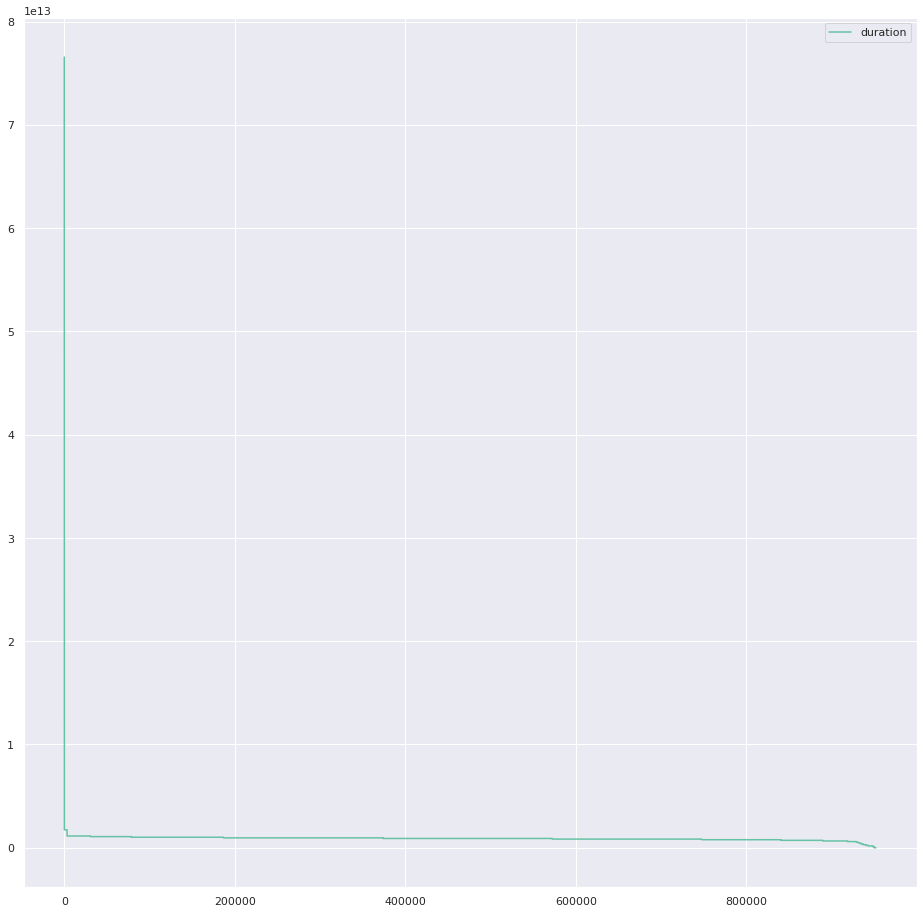

In [432]:
envelopes_lime_df.plot(figsize=(16, 16))